# Clustering Case Study: Customer Segmentation with K-Means -  Tier 3
***
This case study is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by the `yhat` blog. Please feel free to refer to the post for additional information, and solutions.

Structure of the mini-project:

1. **Sourcing and loading**
    * Load the data
    * Explore the data


2. **Cleaning, transforming and visualizing**
    * Data Wrangling: Exercise Set 1
        - Creating a matrix with a binary indicator for whether they responded to a given offer
        - Ensure that in doing so, NAN values are dealt with appropriately
    

3. **Modelling** 
    * K-Means clustering: Exercise Sets 2 and 3
        - Choosing K: The Elbow method
        - Choosing K: The Silhouette method
        - Choosing K: The Gap statistic method
    
    * Visualizing clusters with PCA: Exercise Sets 4 and 5


4. **Conclusions and next steps**
    * Conclusions
    * Other clustering algorithms (Exercise Set 6)

In [331]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

## 1. Sourcing and loading
### 1a. Load the data
The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [332]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheet_name=0)

### 1b. Explore the data

In [333]:
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]

In [334]:
df_offers.head(33)

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True
5,6,March,Prosecco,144,86,Chile,False
6,7,March,Prosecco,6,40,Australia,True
7,8,March,Espumante,6,45,South Africa,False
8,9,April,Chardonnay,144,57,Chile,False
9,10,April,Prosecco,72,52,California,False


We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [335]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheet_name=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## 2. Cleaning, transforming and visualizing
### 2a. Data Wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [336]:
#your turn

#Merge the two datasets -- using left merge because we are only interested in offers which resulted in customers 
##(maybe all did, but this is cleaner)
df_merged = pd.merge(df_transactions, df_offers)

#Create a pivot table with customers as rows and each transaction as columns
df_pivot = df_merged.pivot_table(values=['n'], index=['customer_name'], columns=['offer_id'], fill_value=0)

In [337]:
#View pivot table
df_pivot

n                             ...                              
offer_id      1  2  3  4  5  6  7  8  9  10  ... 23 24 25 26 27 28 29 30 31 32
customer_name                                ...                              
Adams          0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  1  1  0  0
Allen          0  0  0  0  0  0  0  0  1  0  ...  0  0  0  0  1  0  0  0  0  0
Anderson       0  0  0  0  0  0  0  0  0  0  ...  0  1  0  1  0  0  0  0  0  0
Bailey         0  0  0  0  0  0  1  0  0  0  ...  0  0  0  0  0  0  0  1  0  0
Baker          0  0  0  0  0  0  1  0  0  1  ...  0  0  0  0  0  0  0  0  1  0
...           .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
Williams       0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  1  0
Wilson         0  0  0  0  0  0  0  1  0  0  ...  0  0  0  0  0  0  0  1  0  0
Wood           1  0  0  0  0  0  0  0  0  1  ...  0  0  0  0  0  0  0  0  1  0
Wright         0  0  0  1  0  1  0  0  0  0  ...  0  0  0  0  1  0  0  0  0  0
Young          0  0  0  0  0  1  0  0  1  0  ...  0  0  0  0  0  0  0  0  1  1

[100 rows x 32 columns]

## 3. Modelling 
### 3a. K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

#### 3ai. Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

**Hint:** the Elbow Method is discussed in part 2 of the Harvard Clustering lecture. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
<li> Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

In [338]:
# your turn

#Import packages
from sklearn.cluster import KMeans
import numpy as np

#Create a numpy matrix `x_cols` with only the columns representing the offers
x_cols = df_pivot.to_numpy()

#Write code that applies the [`KMeans`] clustering method from scikit-learn to this matrix.
#Create a range for each value of k first
k_values = list(range(2,11))

#Create blank list for ss and blank dict for assignments (sourced from Tier 1)
ss = []
assignments = {}

#Iterate through each possible value of k
for k in k_values:
    kmeans = KMeans(n_clusters = k)
    assigned_cluster = kmeans.fit_predict(x_cols)
    centers = kmeans.cluster_centers_
    ss.append(np.sum((x_cols - centers[assigned_cluster]) ** 2))
    assignments[str(k)] = assigned_cluster

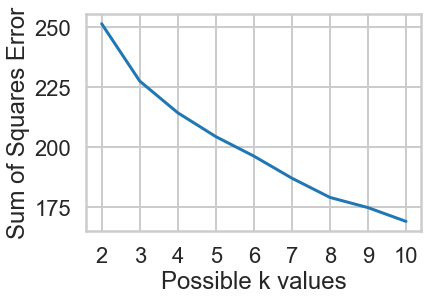

In [339]:
#Construct a plot showing  𝑆𝑆  for each  𝐾

plt.plot(k_values, ss)
plt.xlabel('Possible k values')
plt.ylabel('Sum of Squares Error')
plt.xticks(k_values)
plt.show()

* Pick a value of k based on this plot
<br>I might pick k = 3, but this plot does not have a super clear elbow

3


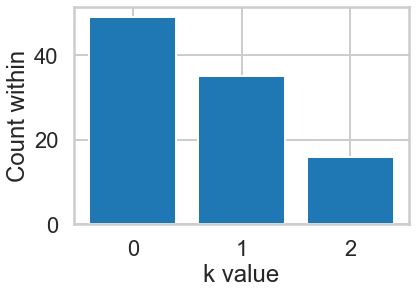

In [340]:
#Make a bar chart showing the number of points in each cluster for k-means under the best  𝐾

best_k = 3

assignments_best_k = assignments[str(best_k)]
counts = np.bincount(assignments_best_k)
print(len(counts))

plt.bar(range(best_k), counts)

plt.xlabel("k value")
plt.ylabel("Count within")
plt.xticks(range(best_k))
plt.show()

#### 3aii. Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

**Hint**: Scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>
</div>

For n_clusters = 2 The average silhouette_score is : 0.09365573283492713
For n_clusters = 3 The average silhouette_score is : 0.11889942863638556
For n_clusters = 4 The average silhouette_score is : 0.12347053919571699
For n_clusters = 5 The average silhouette_score is : 0.14092516241984757
For n_clusters = 6 The average silhouette_score is : 0.1371798939109807
For n_clusters = 7 The average silhouette_score is : 0.1161092456616906
For n_clusters = 8 The average silhouette_score is : 0.11339573832632867
For n_clusters = 9 The average silhouette_score is : 0.12505960527779877
For n_clusters = 10 The average silhouette_score is : 0.11928332134753233


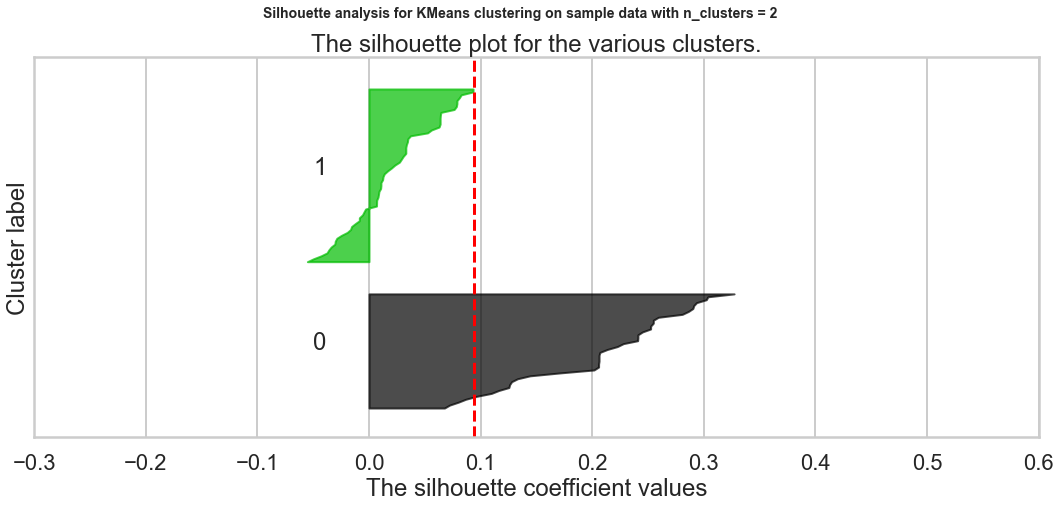

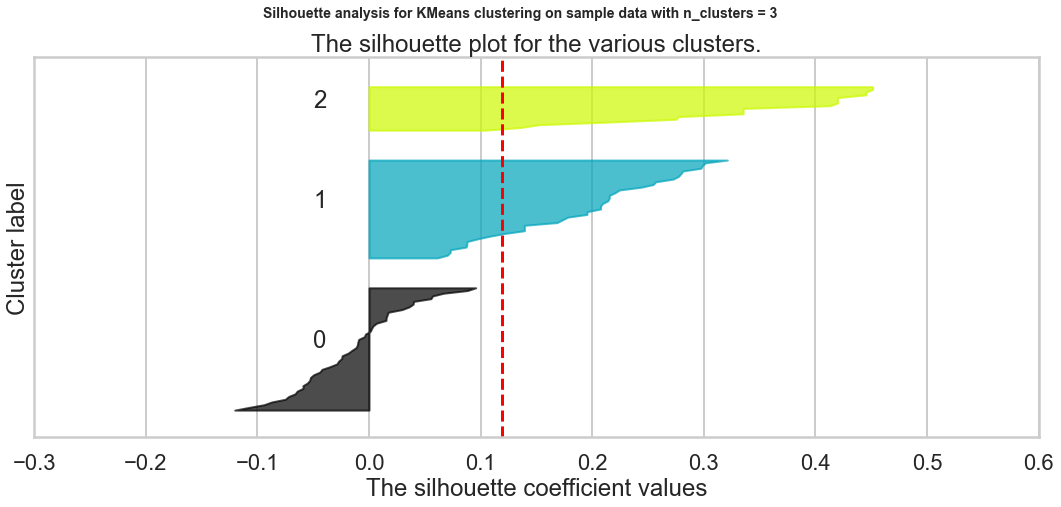

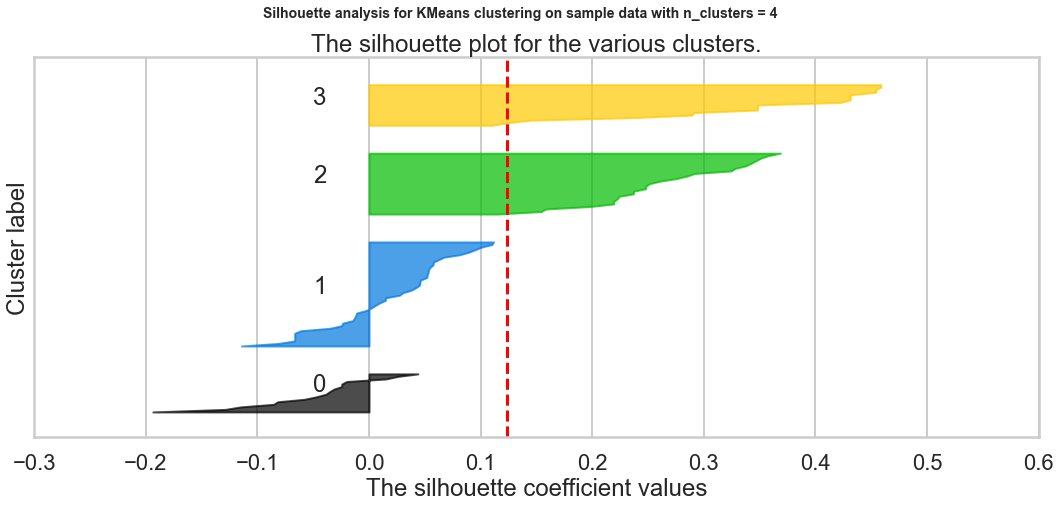

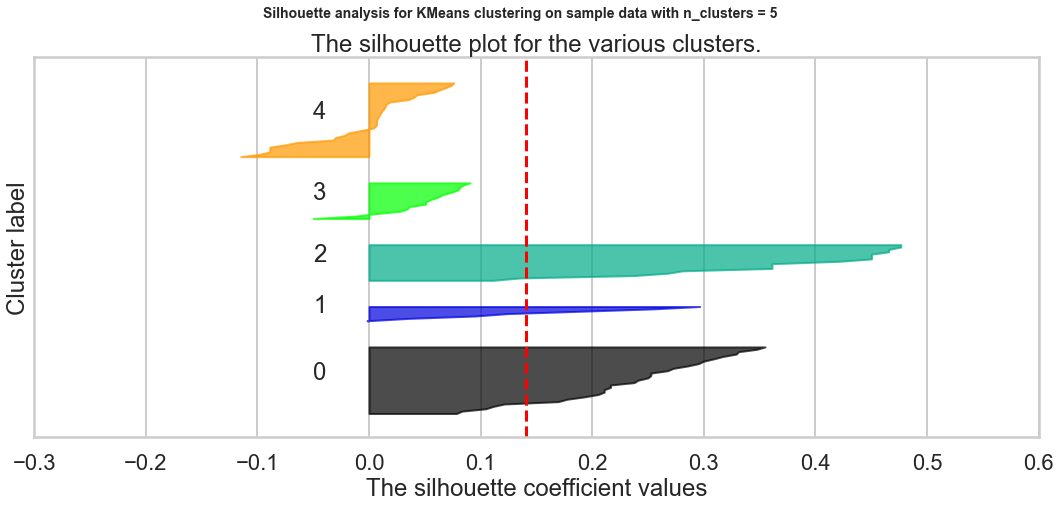

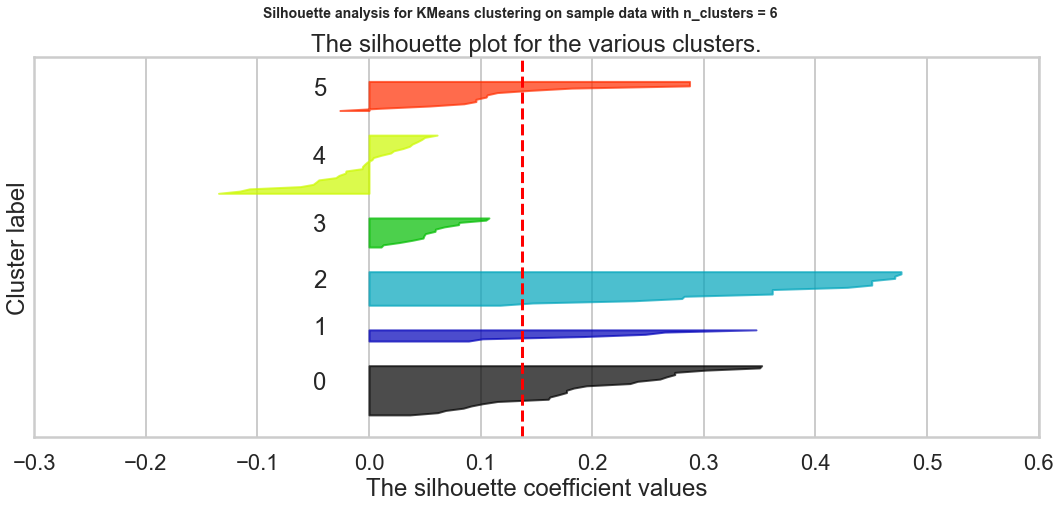

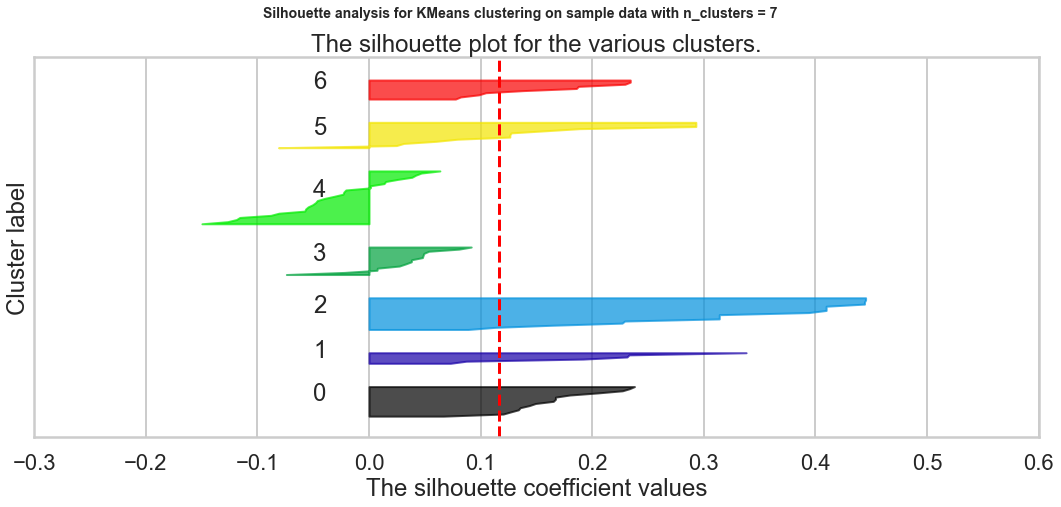

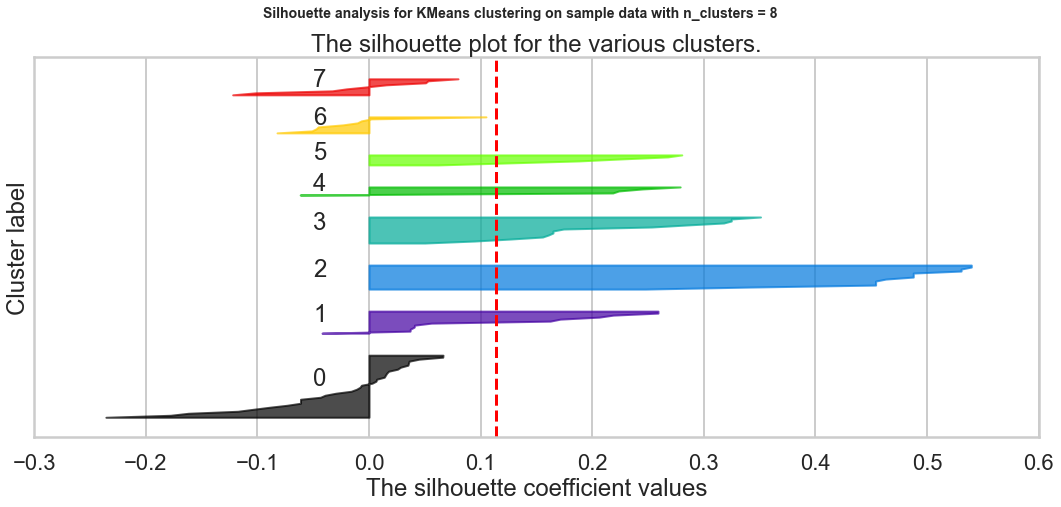

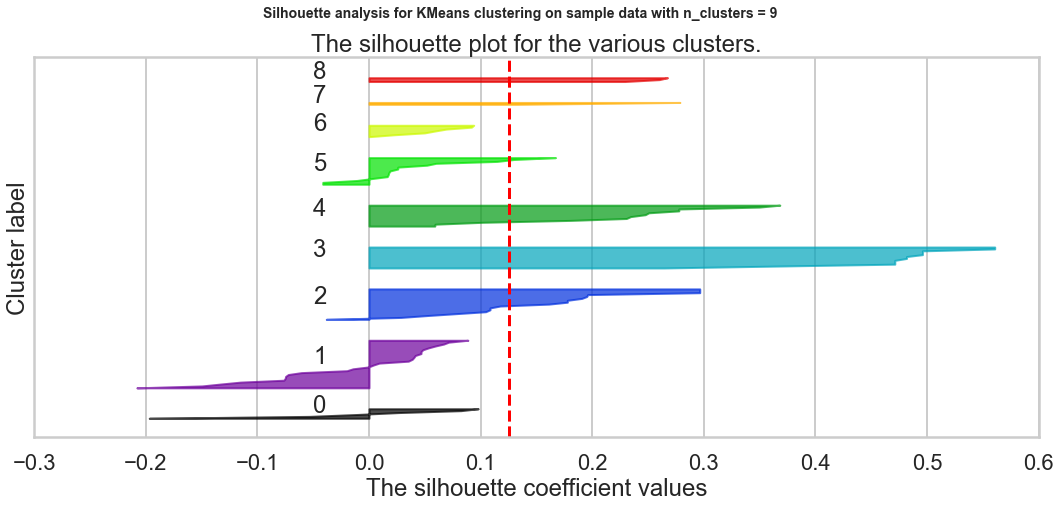

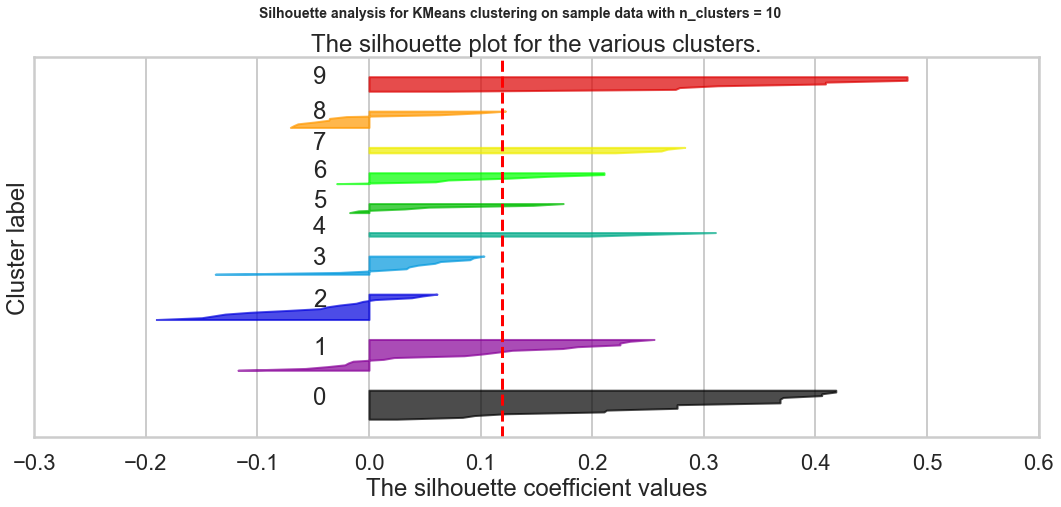

In [341]:
# Your turn.

#Import packages -- note some of these have already been imported, so commenting out for future reference

#from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#import matplotlib.pyplot as plt
import matplotlib.cm as cm
#import numpy as np

# Make an empty list called avg_silhouette_scores -- sourced from tier 1
avg_silhouette_scores = []


#Iterate through each possible value of k
for k in k_values:
    #BELOW CODE ADAPTED FROM https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.3, 0.6])
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_cols) + (k + 1) * 10])
    
    # Initialize the clusterer with k_values value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusterer.fit_predict(x_cols)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(x_cols, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    
    #Sourced from Tier1
    avg_silhouette_scores.append(silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_cols, cluster_labels)
    
    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
    
        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')


Text(0, 0.5, 'Average Silhouette Score')

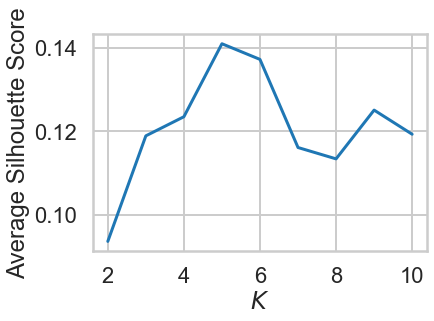

In [342]:
# Compute the average silhouette score for each  𝐾  and plot it. 
plt.plot(k_values, avg_silhouette_scores)
plt.xlabel("$K$")
plt.ylabel("Average Silhouette Score")

RM NOTES:
* I don't think any of these are great structures, but it does look like 5 clusters has the highest silhouette score followed by 6 clusters.
* The silhouette plot for 6 clusters looks more balanced than the plot for 5 clusters though with less variation in size of clusters 0 & 2, and clusters 0,1,2,and 5 having above average silhouette coefficient values.
* The plot for 5 clusters has 3 clusters 0,1, and 2 having above average silhouette coefficient values, but there is more variation in the size of those clusters.

#### 3aiii.  Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

#### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

**Hint:** See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

### 3b. Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

**Hint:** PCA was discussed in the previous subunit. If you need help with it, consult [this useful article](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c) and [this visual explanation](http://setosa.io/ev/principal-component-analysis/). 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them `x` and `y`)
  </ul>
<li> Plot a scatterplot of the `x` vs `y` columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

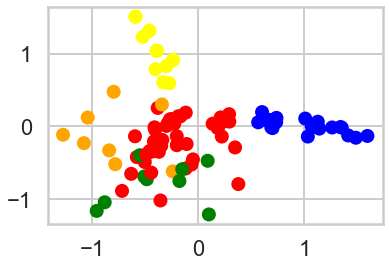

In [343]:
#your turn

#Use scikit-learn's PCA function to reduce the dimensionality of your clustering data to 2 components

#Create model from best k above -- we'll go with 5
model = KMeans(n_clusters = 5)

#Fit that model to x_cols
cluster_assignments = model.fit_predict(x_cols)

#Create visualization of clusters -- sourced from Tier 1
import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(['red', 'green', 'blue','yellow','orange'])

#Run PCA function
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

#Sourced from Tier 1
pc1, pc2 = zip(*pca.fit_transform(x_cols))
plt.scatter(pc1, pc2, c=cluster_assignments.tolist(), cmap=cmap)

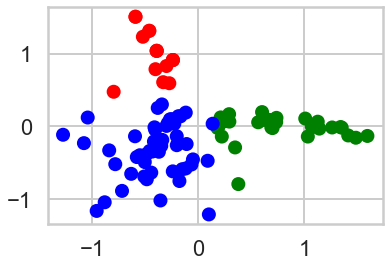

In [344]:
#Looks like a lot of overlap here, let's try 3

#Create model from best k -- trying 3 based on PCA plot
model = KMeans(n_clusters = 3)

#Fit that model to x_cols
cluster_assignments = model.fit_predict(x_cols)

#Create visualization of clusters -- sourced from Tier 1
import matplotlib.colors
cmap = matplotlib.colors.ListedColormap(['red', 'green', 'blue'])

#Run PCA function
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

#Sourced from Tier 1
pc1, pc2 = zip(*pca.fit_transform(x_cols))
plt.scatter(pc1, pc2, c=cluster_assignments.tolist(), cmap=cmap)

* RM Note: Using PCA to plot the clusters, there appears to be too much overlap with 5 clusters, and boundaries are more defined with 3 clusters.

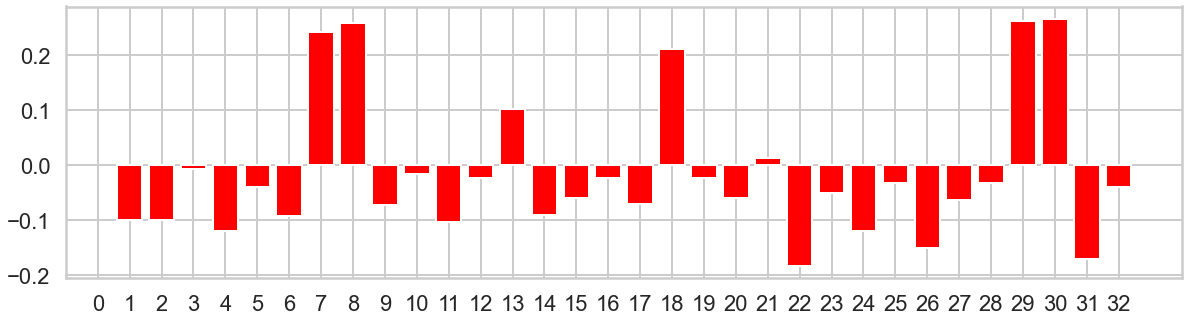

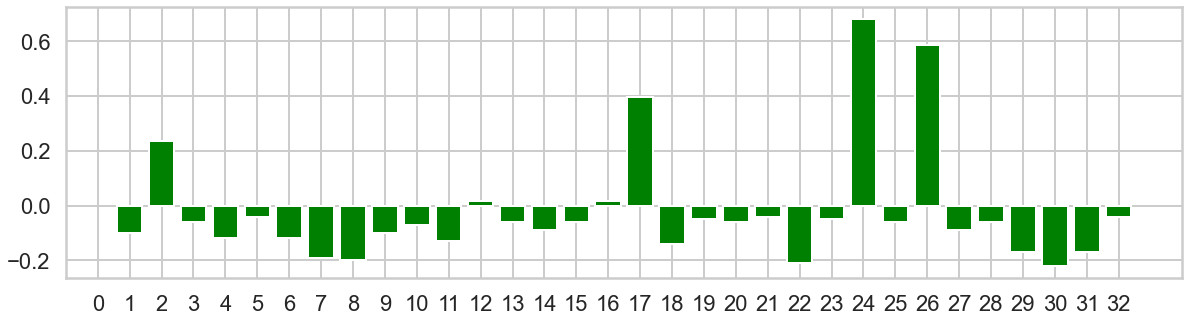

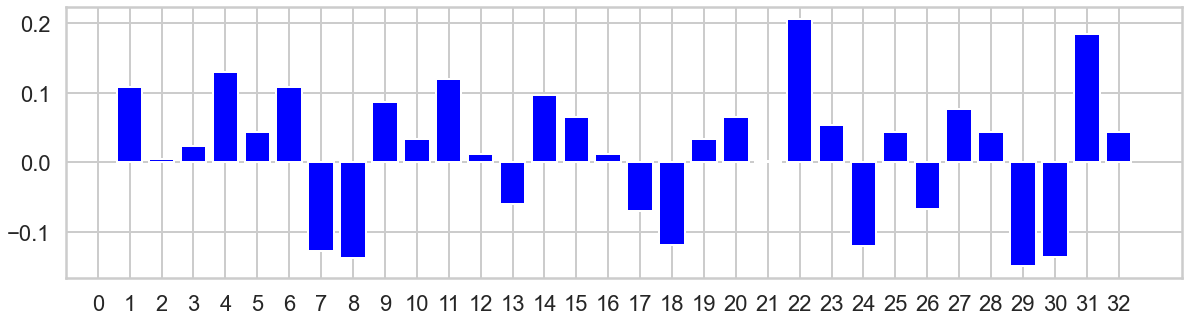

In [345]:
#CODE ADAPTED FROM TIER 1
# Plot proportion of promotions in each cluster
model = sklearn.cluster.KMeans(n_clusters=3)
cluster_assignments = model.fit_predict(x_cols)

colors = ['red', 'green', 'blue']
offer_proportions = df_pivot.sum(axis=0) / 100  #Percentage of offers among total sample
for i in range(3):
    plt.rcParams["figure.figsize"] = (20,5)
    plt.figure(i)
    cluster = df_pivot[cluster_assignments == i] #Filter df by each cluster (0=32, 1=48 customers, 2=20)
    offer_proportions_cluster = cluster.sum(axis=0) / cluster.shape[0] #Percentage of e. promotion w.in e. cluster
    lift = offer_proportions_cluster - offer_proportions #Diff. bet. percentage w.in cluster and w.in overall
    plt.bar(range(1, 33), lift, color=colors[i])
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32])

What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We color coded each point based on it's cluster so it's easier to see them.

##### RM Note:
When plotting the lift (within cluster proportion for each promotion - overall proportion for each promotion) lift is summarized within in cluster below:
<br><br>
* Cluster 1: (Potential Theme: 6 minimum quantity)
    * Promotion 29: Pinot Grigio	6	87	France	False
    * Promotion 30: Malbec	6	54	France	False
    * Promotion 8:  Espumante	6	45	South Africa	False
    * Promotion 7: Prosecco, 6, 40, Aus. True
    * Promotion 18: Espumante	6	50	Oregon	False
	* Promotion 13: Merlot	6	43	Chile	False (Lesser extent)
<br><br>
* Cluster 2: (Potential Theme: Champagne/Bubbly theme)
	* Promotion 22: Champagne	72	63	France	False
	* Promotion 31: Champagne	72	89	France	False
	* Promotion 4: Champagne	72	48	France	True
	* Promotion 11: Champagne	72	85	France	False
	* Promotion 6: Prosecco	6	40	Australia	True
	* Promotion 14: Merlot	72	64	Chile	False (Lesser extent)
	* Promotion 1: Malbec	72	56	France	False (Lesser extent)
	* Promotion 9: Chardonnay	144	57	Chile	False (Lesser extent)
<br><br>
* Cluster 3: (Potential Theme: Pinot Noir)
	* Promotion 2: Pinot Noir	72	17	France	False
	* Promotion 17: Pinot Noir	12	47	Germany	False
	* Promotion 24: Pinot Noir	6	34	Italy	False
	* Promotion 26: Pinot Noir	144	83	Australia	False

<div class="span5 alert alert-info">
<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

Text(0, 0.5, 'Explained Variance Ratio')

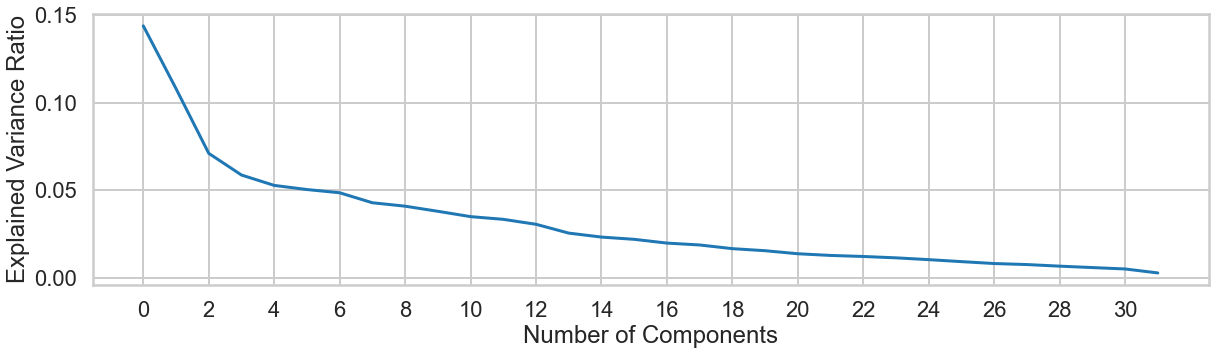

In [346]:
#your turn
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(x_cols)

# Do the rest on your own :)

#Create the `explained_variance_` field 
evr = pca.explained_variance_ratio_

#Plot evr
plt.plot(range(len(evr)), evr)
plt.rcParams["figure.figsize"] = (20,5)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30])
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')

##### RM Note: 
* Elbow is at about 3 components with a total variance explained by 3 components, 0(~ .14), 1(~ .11), and 2(~.07) being about 32%.
* Optimal number of dimensions: 3

## 4. Conclusions and next steps
### 4a. Conclusions
What can you conclude from your investigations? Make a note, formulate it as clearly as possible, and be prepared to discuss it with your mentor in your next call. 

##### RM Note
##### Summary
* Elbow method for selecting k in kmeans clustering indicated 3 might be a good value for k although the elbow was not super clear.
* The silhouette method also did not find a very strong structure with k=5 having the highest silhouette score of 0.14 which is too low to even assume a structure was found.
* Using PCA to plot the clusters, there appears to be too much overlap with 5 clusters, and boundaries are more defined with 3 clusters.
* Plotting lift (within cluster proportion for each promotion - overall proportion for each promotion) using KMeans clustering with 3 clusters, we identify some potential patterns within each cluster.
* Using PCA to determine the optimal number of dimensions, we see that 3 components (promotions in this case) explain nearly one-third of the variance in the model.

##### Conclusion
* While the different clustering methods may generate different clusters, it does appear that there is soem concensus that there are 3 clusters, although generally they might not be very strong structures.
* Based on the lift visualization, we might be able to segment our audience into the following 3 groups:
    * Group 1 (n=32): More motivated to purchase when promotions include a minimum quantity of 6.
    * Group 2 (n=48): More motivated to purchase when promotions include Champagne or bubbly variations like Prosecco.
    * Group 3 (n=20): More motivated to purchase when promotions include Pinot Noir.
    
##### Next Steps
* These clusters are based on a k-means clustering algorithm. It might be beneficial to attempt to develop clusters using other methods to check if similar clusters are developed or if a stronger model can be developed/


### 4b. Other clustering algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>
</div>


##### 1. Affinity Propagation Clustering

Estimated number of clusters: 14
Total customers in cluster  0 :  8
Total customers in cluster  1 :  3
Total customers in cluster  2 :  6
Total customers in cluster  3 :  10
Total customers in cluster  4 :  8
Total customers in cluster  5 :  3
Total customers in cluster  6 :  10
Total customers in cluster  7 :  12
Total customers in cluster  8 :  5
Total customers in cluster  9 :  3
Total customers in cluster  10 :  10
Total customers in cluster  11 :  5
Total customers in cluster  12 :  10
Total customers in cluster  13 :  7
For n_clusters = 14  The average silhouette_score is : 0.12227751845150901


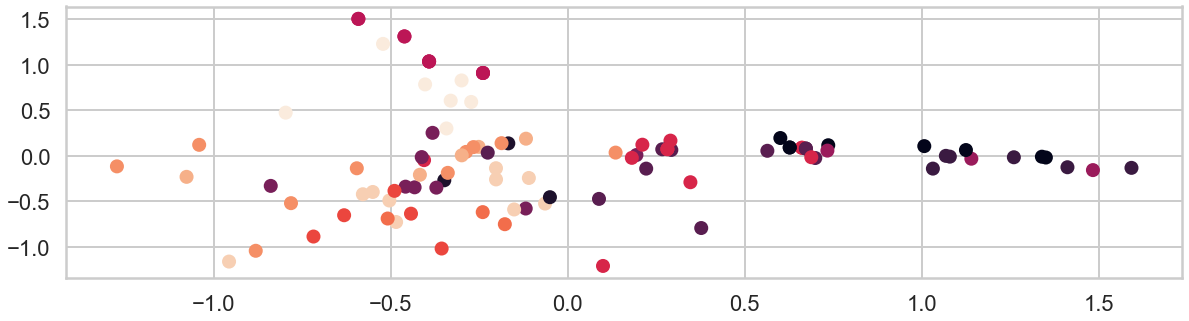

In [347]:
# Your turn

#Affinity Propagation -- code adapted from https://scikit-learn.org/stable/auto_examples/cluster/plot_affinity_propagation.html
from sklearn.cluster import AffinityPropagation

AP = AffinityPropagation(random_state=10)
AP_fit = AP.fit(x_cols)
cluster_centers_indices = AP_fit.cluster_centers_indices_

n_clusters_ = len(cluster_centers_indices)

# Predict the cluster for all the samples
AP_cluster_assignments = AP.fit_predict(x_cols)


print('Estimated number of clusters: %d' % n_clusters_)
for i in range(n_clusters_):
    cluster = df_pivot[AP_cluster_assignments == i]
    print('Total customers in cluster ',i,': ',cluster.shape[0])

silhouette_avg = silhouette_score(x_cols, AP_cluster_assignments)
print("For n_clusters =", n_clusters_," The average silhouette_score is :", silhouette_avg)


#Run PCA function
pca = PCA(n_components=2)

#Plot clusters using PCA 2 components
pc1, pc2 = zip(*pca.fit_transform(x_cols))
plt.scatter(pc1, pc2, c=AP_cluster_assignments.tolist())
plt.show()


##### RM NOTE
* The Affinity Propagation clustering algorithm estimated there are 14 clusters, which seems too high for this sample since the largest cluster only has 12 customers.
* The silhouette score for the AP clustering algorithm was also very low at 0.12, although slightly higher than that for the k-means clustering algorithm with 3 clusters (0.119...).

##### 2. Spectral Clustering

In [348]:
#Code adapted from: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

from sklearn.cluster import SpectralClustering

spectral_clustering = SpectralClustering(n_clusters=3, random_state=10)
spectral_clustering_fit = spectral_clustering.fit(x_cols)
labels = spectral_clustering_fit.labels_

spectral_cluster_assignments = spectral_clustering.fit_predict(x_cols)

For n_clusters = 3  The average silhouette_score is : 0.10611539040197304
Total customers in cluster  0 :  31
Total customers in cluster  1 :  55
Total customers in cluster  2 :  14


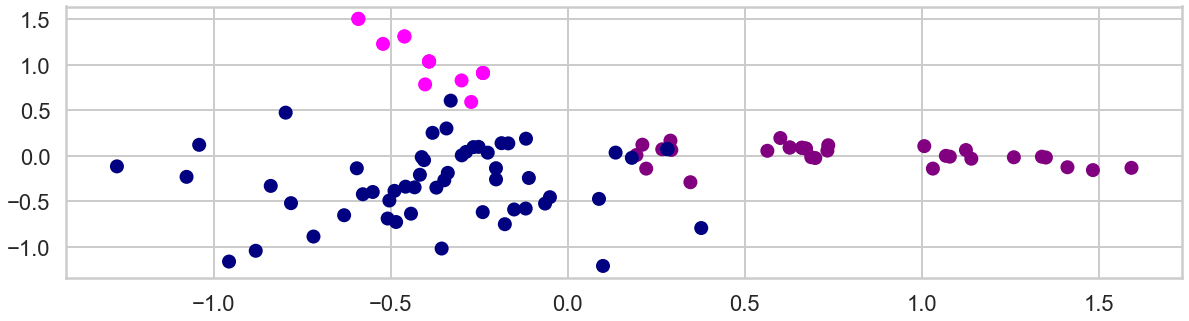

In [349]:
silhouette_avg = silhouette_score(x_cols, spectral_cluster_assignments)
print("For n_clusters =","3"," The average silhouette_score is :", silhouette_avg)


for i in range(3):
    cluster = df_pivot[spectral_cluster_assignments == i]
    print('Total customers in cluster ',i,': ',cluster.shape[0])


#Run PCA function
pca = PCA(n_components=2)

#Plot clusters using PCA 2 components
cmap = matplotlib.colors.ListedColormap(['purple', 'navy', 'magenta'])
pc1, pc2 = zip(*pca.fit_transform(x_cols))
plt.scatter(pc1, pc2, c=spectral_cluster_assignments.tolist(), cmap=cmap)
plt.show()

##### RM_NOTE:
* The spectral clustering algorithm with 3 clusters generated a PCA plot with less overlap.
* However, the silhouette score is very low at 0.106 and the clusters are somewhat unbalanced with cluster 1 having more than half of the customers.

##### 3. Agglomerative Clustering

In [350]:
#Code adapted from: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
from sklearn.cluster import AgglomerativeClustering

#Create clustering algorithm
#Tested all linkage options, ward had most balance
agglom_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglom_clustering_fit = agglom_clustering.fit(x_cols)
labels = agglom_clustering_fit.labels_

agglom_clustering_assignments = agglom_clustering.fit_predict(x_cols)

For n_clusters = 3  The average silhouette_score is : 0.11625878863607858
Total customers in cluster  0 :  49
Total customers in cluster  1 :  34
Total customers in cluster  2 :  17


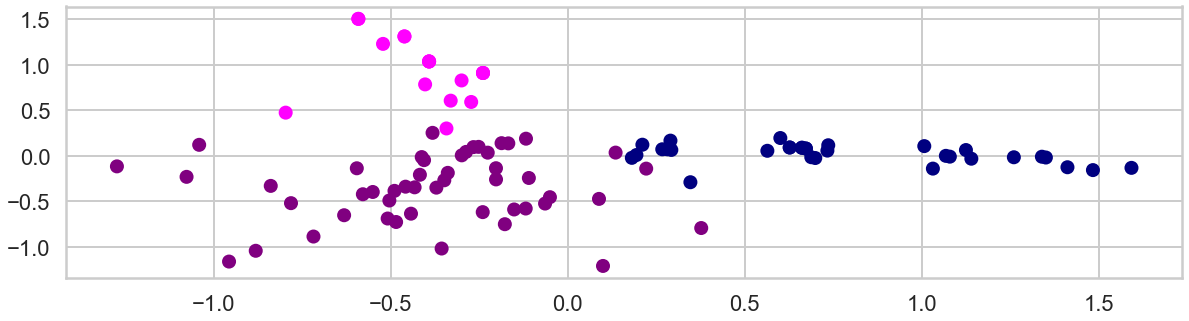

In [351]:
silhouette_avg = silhouette_score(x_cols, agglom_clustering_assignments)
print("For n_clusters =","3"," The average silhouette_score is :", silhouette_avg)


for i in range(3):
    cluster = df_pivot[agglom_clustering_assignments == i]
    print('Total customers in cluster ',i,': ',cluster.shape[0])


#Run PCA function
pca = PCA(n_components=2)

#Plot clusters using PCA 2 components
cmap = matplotlib.colors.ListedColormap(['purple', 'navy', 'magenta'])
pc1, pc2 = zip(*pca.fit_transform(x_cols))
plt.scatter(pc1, pc2, c=agglom_clustering_assignments.tolist(), cmap=cmap)
plt.show()

##### RM_NOTE:
* The agglomerative clustering algorithm with 3 clusters using ward linkage resulted in a higher silhouette score than spectral at 0.116.
* The clusters are a little more balanced in size as well.

##### 4. DBSCAN

In [388]:
#Code adapted from: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html?highlight=dbscan#sklearn.cluster.DBSCAN 
from sklearn.cluster import DBSCAN

#Create clustering algorithm
#Selected eps=1 and min_samples=4 thr. testing diff. combos & comparing noise, cluster size, and silhouette score
DBSCAN_cluster = DBSCAN(eps=1, min_samples=4)
#eps=3, min_samples=2
DBSCAN_cluster_fit = DBSCAN_cluster.fit(x_cols)
labels = DBSCAN_cluster_fit.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


DBSCAN_cluster_assignments = DBSCAN_cluster.fit_predict(x_cols)

Estimated number of clusters: 3
Estimated number of noise points: 56
Total customers in cluster  0 :  26
Total customers in cluster  1 :  14
Total customers in cluster  2 :  4
For n_clusters = 3  The average silhouette_score is : 0.041771182765493825


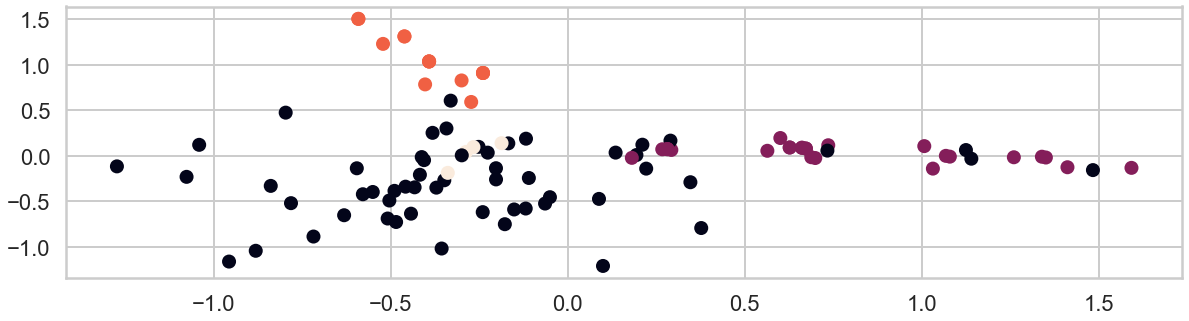

In [389]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

for i in range(n_clusters_):
    cluster = df_pivot[DBSCAN_cluster_assignments == i]
    print('Total customers in cluster ',i,': ',cluster.shape[0])


silhouette_avg = silhouette_score(x_cols, DBSCAN_cluster_assignments)
print("For n_clusters =", n_clusters_," The average silhouette_score is :", silhouette_avg)


#Run PCA function
pca = PCA(n_components=2)

#Plot clusters using PCA 2 components
pc1, pc2 = zip(*pca.fit_transform(x_cols))
plt.scatter(pc1, pc2, c=DBSCAN_cluster_assignments.tolist())
plt.show()

##### RM_NOTE:
* The DBSCAN clustering algorithm with eps = 1 and min_samples = 4 resulted in 3 clusters, but more than half of the points were considered noise.
* The silhouette score was very low at 0.041.

##### FINAL NOTE:
While the Affinity Propagation clustering algorithm had the highest silhouette score, the number of clusters likely indicates overfitting. Based on these initial algorithms, I do think the kmeans cluster algorithm with 3 clusters had the best results. 